#**Iris Flower Classification** 

###Problem Statement

<p align = "justify"> The data set consists of the physical parameters of three species of flower - Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.</p>

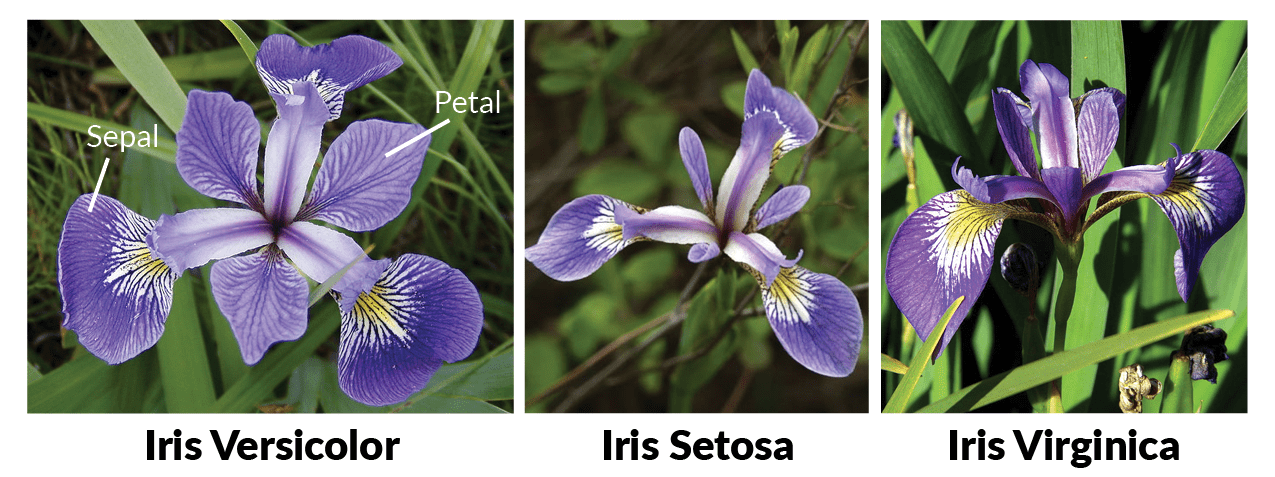

##Understanding the data

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                                 # Data visualisation library
import seaborn as sns                                                           # Data visualisation library
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Create a list of column names 
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
# Load .csv file into pandas DataFrame 
# pandas.read_csv(filepath_or_buffer, names = NoDefault.no_default) reads a comma-separated values (csv) file into DataFrame
# filepath_or_buffer: str, path object or file-like object
  # Path to .csv file
# names: array-like, optional
  # List of column names to use. Duplicates in this list are not allowed.
iris_df = pd.read_csv('/content/iris.csv', names = col_names)                   # pandas DataFrame object

# Print DataFrame 
print(iris_df)                     

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# Print shape of DataFrame 
# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame
print(iris_df.shape)                                                            # tuple object

(150, 5)


In [ ]:
# Print first few rows of DataFrame
# pandas.DataFrame.head(n = 5) returns the first n rows
# n: int, default 5
  # Number of rows to select
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Print summary of DataFrame 
# pandas.DataFrame.info() prints a concise summary of a DataFrame
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# Print statistical summary of DataFrame 
# pandas.DataFrame.describe() generates descriptive statistics of a DataFrame 
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# pandas.DataFrame.value_counts() returns a Series containing counts of unique rows in the DataFrame
print(iris_df['class'].value_counts())                                          # pandas Series object

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64


##Analysing the data visually

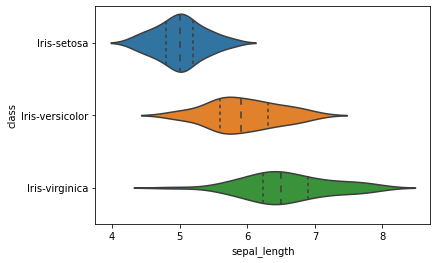

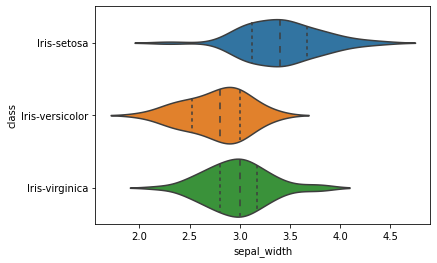

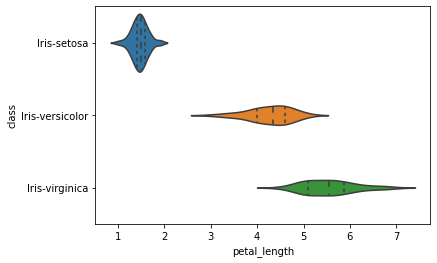

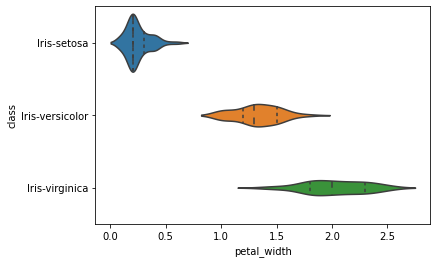

In [ ]:
# Plot violin plot
# Violin plot shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared
# seaborn.violinplot(x = None, y = None, inner = 'box') plots violin plot
# x, y: names of variables in data or vector data, optional
  # Inputs for plotting long-form data
# inner{“box”, “quartile”, “point”, “stick”, None}, optional
  # Representation of the datapoints in the violin interior. If quartiles, draw the quartiles of the distribution.
sns.violinplot(x = 'sepal_length', y = 'class', data = iris_df, inner = 'quartile')
plt.show()
sns.violinplot(x = 'sepal_width', y = 'class', data = iris_df, inner = 'quartile' )
plt.show()
sns.violinplot(x = 'petal_length', y = 'class', data = iris_df, inner = 'quartile')
plt.show()
sns.violinplot(x = 'petal_width', y = 'class', data = iris_df, inner = 'quartile')
plt.show()

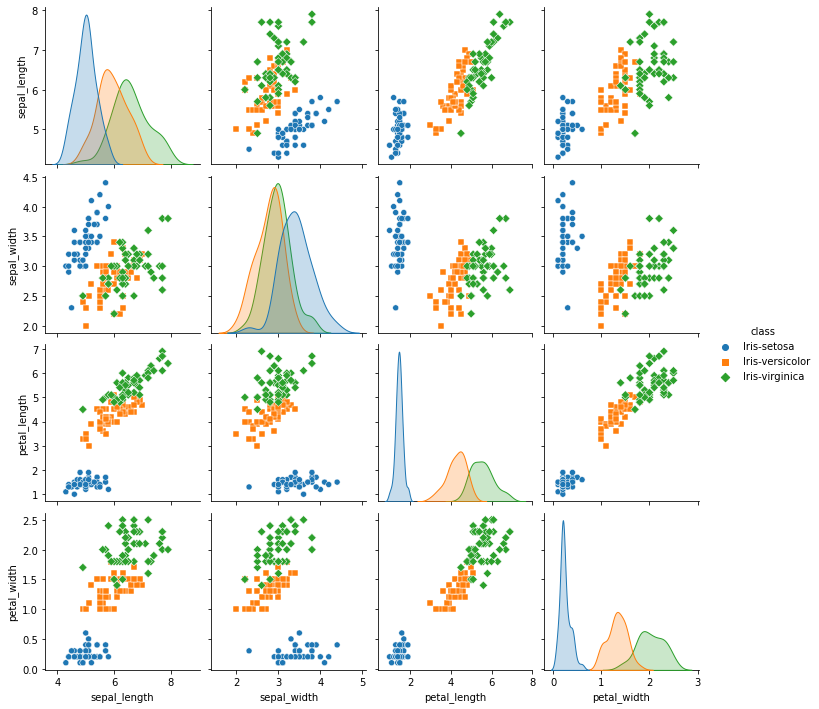

In [ ]:
# Plot pairplot
# seaborn.pairplot(data, hue = None, markers = None) plots pairwise relationships in a dataset
# data: pandas.DataFrame
  # Tidy (long-form) dataframe where each column is a variable and each row is an observation
# hue : name of variable in data
  # Variable in data to map plot aspects to different colors
# markers : single matplotlib marker code or list
  # Either the marker to use for all scatterplot points or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers
sns.pairplot(iris_df, hue = 'class', markers=["o", "s", "D"])
plt.show()

In [ ]:
# DataFrame.corr() computes pairwise correlation of columns, excluding NA/null values
print(iris_df.corr())                                                           # pandas DataFrame object

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


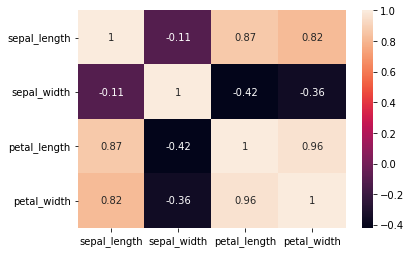

In [ ]:
# Plot heatmap to check correlation
# seaborn.heatmap(data, annot = None, cmap = None) plots rectangular data as a color-encoded matrix
# data : rectangular dataset
  # 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows
# annot : bool or rectangular dataset, optional
  # If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index
sns.heatmap(iris_df.corr(), annot = True)
plt.show()

##Dividing the data for training and testing

In [ ]:
# Split the dataset: x has dependent variables and y has independent variable (class)
# DataFrame.drop(labels = None, axis = 0) drops specified labels from rows or columns
# label: single label or list-like
  # Index or column labels to drop
# axis{0 or ‘index’, 1 or ‘columns’}, default 0
  # Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
X = iris_df.drop('class', axis = 1)                                             # pandas DataFrame object
y = iris_df['class']                                                            # pandas DataFrame object
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# Split dataset into train and test set
# sklearn.model_selection.train_test_split(*arrays, test_size = None, random_state = None)
# *arrays: sequence of indexables with same length / shape[0]
  # Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes
# test_size: float or int, default = None
  # If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
# random_state: int, RandomState instance or None, default = None
  # Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)                           # pandas Series objects 

## Training the model

<p align = "justify">Using some of the commonly used algorithms, we will train our model to check how accurate every algorithm is. We will implement following algorithms to compare:</p>

1.   Logistic Regression
2.   K – Nearest Neighbour (KNN)
3.   Support Vector Machine (SVM)
4.   Decision Tree
5.   Gaussian Naive Bayes
6.   Linear Discriminant Analysis

In [ ]:
# Using Logistic Regression

# Create an instance of LogisticRegression
model = LogisticRegression()

# Train the model 
# fit(X, y[, sample_weight]) fits the model according to the given training data
model.fit(X_train, y_train)

# Perform prediction
# predict(X) predicts class labels for samples in X
y_pred = model.predict(X_test)                                                  # one dimensional numpy array      

# Comparing actual class and predicted class
df = pd.DataFrame()                                                             # pandas DataFrame object 
df['Actual class'] = y_test
df['Predicted class'] = y_pred
print(df.head(10))
print("\n")

# Summary of predictions made by the classifier/model
# sklearn.metrics.classification_report(y_true, y_pred) builds a text report showing the main classification metrics 
# y_true: array-like of shape (n_samples,)
  # Ground truth (correct) target values
# y_pred: array-like of shape (n_samples,)
  # Estimated targets as returned by a classifier
print(metrics.classification_report(y_test, y_pred))                            # str object 
# sklearn.metrics.confusion_matrix(y_true, y_pred) to compute confusion matrix to evaluate the accuracy of a classification
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score 
# sklearn.metrics.accuracy_score(y_true, y_pred) - accuracy classification score
# y_true: 1d array-like, or label indicator array / sparse matrix
  # Ground truth (correct) labels.
# y_pred: 1d array-like, or label indicator array / sparse matrix
  # Predicted labels, as returned by a classifier.
accuracy = metrics.accuracy_score(y_test, y_pred)                               # float object
print("\nAccuracy of logistic regression model is ", accuracy)
print("\n")

classifiers = []
accuracy_scores = []
classifiers.append('Logistic Regression')
accuracy_scores.append(accuracy)

        Actual class  Predicted class
14       Iris-setosa      Iris-setosa
98   Iris-versicolor  Iris-versicolor
75   Iris-versicolor  Iris-versicolor
16       Iris-setosa      Iris-setosa
131   Iris-virginica   Iris-virginica
56   Iris-versicolor  Iris-versicolor
141   Iris-virginica   Iris-virginica
44       Iris-setosa      Iris-setosa
29       Iris-setosa      Iris-setosa
120   Iris-virginica   Iris-virginica


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of logistic regression model is  0.9666666666666667




In [ ]:
# Using K Nearest Neighbour (KNN)

# Create an instance of KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 8)

# Train the model
model.fit(X_train, y_train)

# Perform Prediction
y_pred = model.predict(X_test)

# Summary of predictions made by classifier/model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy of K Nearest Neighbour (KNN) is ", accuracy)

classifiers.append('K Nearest Neighbour (KNN)')
accuracy_scores.append(accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour (KNN) is  1.0


In [ ]:
# Using Support Vector Machine (SVM)

# Create an instance of SVC
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Summary of predictions made by classifier/model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy of Support Vector Machine is ", accuracy)

classifiers.append('Support Vector Machine (SVM)')
accuracy_scores.append(accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of Support Vector Machine is  0.9666666666666667


In [ ]:
# Using Decision Tree

# Create an instance of 
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Summary of predictions made by the classifier/model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy of decision tree is ", accuracy)

classifiers.append('Decision Tree')
accuracy_scores.append(accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of decision tree is  0.9666666666666667


In [ ]:
# Using Gaussian Naive Bayes

# Create an instance of GaussianNB
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Summary of predictions 
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy score is ", accuracy)

classifiers.append('Gaussian Naive Bayes')
accuracy_scores.append(accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy score is  0.9666666666666667


In [ ]:
# Using Linear Discriminant Analysis

# Create an instance of GaussianNB
model = LinearDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Summary of predictions 
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy score is ", accuracy)

classifiers.append('Linear Discriminant Analysis')
accuracy_scores.append(accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy score is  1.0


In [ ]:
accuracy_scores = np.array(accuracy_scores) * 100
classifier_accuracy = pd.DataFrame()
classifier_accuracy["classifier"] = classifiers
classifier_accuracy["accuracy"] = accuracy_scores 
print(classifier_accuracy)

                     classifier    accuracy
0           Logistic Regression   96.666667
1     K Nearest Neighbour (KNN)  100.000000
2  Support Vector Machine (SVM)   96.666667
3                 Decision Tree   96.666667
4          Gaussian Naive Bayes   96.666667
5  Linear Discriminant Analysis  100.000000


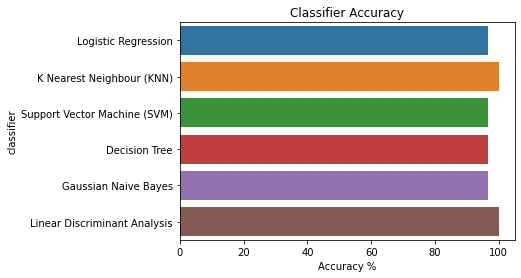

In [ ]:
# seaborn.barplot(x = None, y = None, data = None) shows point estimates and confidence intervals as rectangular bars
# x, y: names of variables in data or vector data, optional
  # Inputs for plotting long-form data
# data: DataFrame, array, or list of arrays, optional
  # Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.
sns.barplot(x = "accuracy", y = "classifier", data = classifier_accuracy)
plt.xlabel("Accuracy %")
plt.title("Classifier Accuracy")
plt.show()

<p align = "justify">K Nearest Neighbour (KNN) and Linear Discriminant Analysis are performing better than other algorithms.</p>